In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
dataset = pd.read_csv('Admission_Predict.csv')

In [3]:
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
print("Jumlah duplikasi: ", dataset.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


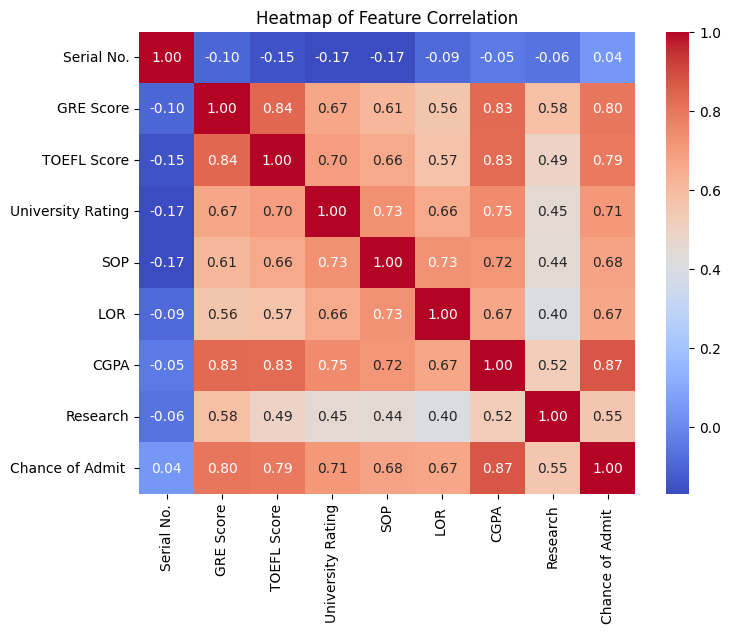

In [7]:
# Hitung korelasi antar fitur
correlation_matrix = dataset.corr()

# Buat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlation')
plt.show()

In [8]:
X = dataset.iloc[:, [6]].values
Y = dataset.iloc[:, 8].values

In [9]:
X= X.reshape(-1,1)

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])  # One neuron in the output layer for regression
])

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

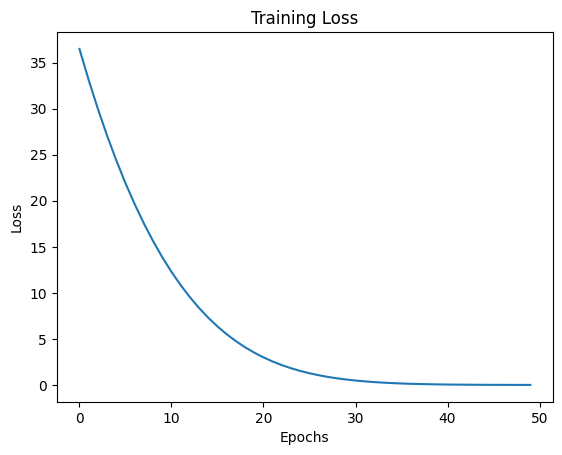

In [15]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [16]:
# Evaluate the model on the testing set
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

4/4 [==============================] - 0s 4ms/step - loss: 0.0092
Test Loss: 0.0092241819947958


In [17]:
# Make predictions
predictions = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [18]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.06663809189796449


In [19]:
nilai_cgpa = 6.0  # Nilai float untuk CGPA

# Persiapkan nilai CGPA dalam bentuk array dua dimensi
nilai_cgpa_2d = [[nilai_cgpa]]  # Bentuk data: [[6.0]]

# Melakukan prediksi menggunakan model regresi yang telah dilatih sebelumnya
prediksi_cgpa = model.predict(nilai_cgpa_2d)

# Mencetak hasil prediksi
print("Prediksi nilai CGPA untuk nilai", nilai_cgpa, ":", prediksi_cgpa)

1/1 [==============================] - 0s 49ms/step
Prediksi nilai CGPA untuk nilai 6.0 : [[0.35169196]]


In [20]:
nilai_cgpa = 7.0  # Nilai float untuk CGPA

# Persiapkan nilai CGPA dalam bentuk array dua dimensi
nilai_cgpa_2d = [[nilai_cgpa]]  # Bentuk data: [[6.0]]

# Melakukan prediksi menggunakan model regresi yang telah dilatih sebelumnya
prediksi_cgpa = model.predict(nilai_cgpa_2d)

# Mencetak hasil prediksi
print("Prediksi nilai CGPA untuk nilai", nilai_cgpa, ":", prediksi_cgpa)

1/1 [==============================] - 0s 54ms/step
Prediksi nilai CGPA untuk nilai 7.0 : [[0.5164496]]


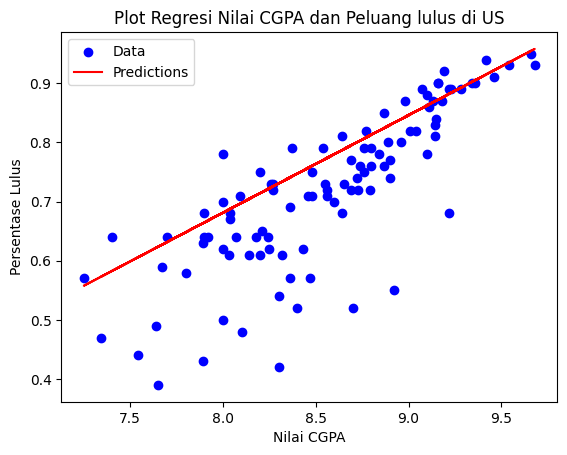

In [22]:
# Membuat scatter plot untuk Nilai CGPA dan Peluang Lulus di US
plt.scatter(X_test, y_test, color='blue', label='Data')
plt.plot(X_test, predictions, color='red', label='Predictions')
plt.title('Plot Regresi Nilai CGPA dan Peluang lulus di US')
plt.xlabel('Nilai CGPA')
plt.ylabel('Persentase Lulus')
plt.legend()
plt.show()